In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('bankruptcy-prevention.csv',sep=";")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.shape

(250, 7)

In [6]:
list(df)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

In [7]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [9]:
df1 = df.drop_duplicates()
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
185    False
187    False
190    False
192    False
194    False
Length: 103, dtype: bool

In [10]:
print(df1)

     industrial_risk   management_risk   financial_flexibility   credibility  \
0                0.5               1.0                     0.0           0.0   
1                0.0               1.0                     0.0           0.0   
2                1.0               0.0                     0.0           0.0   
3                0.5               0.0                     0.0           0.5   
4                1.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
185              0.0               0.5                     0.0           0.5   
187              0.0               0.5                     0.5           0.5   
190              0.0               0.5                     0.5           0.0   
192              0.5               1.0                     0.0           0.0   
194              0.0               1.0                     0.5           0.0   

      competitiveness   operating_risk 

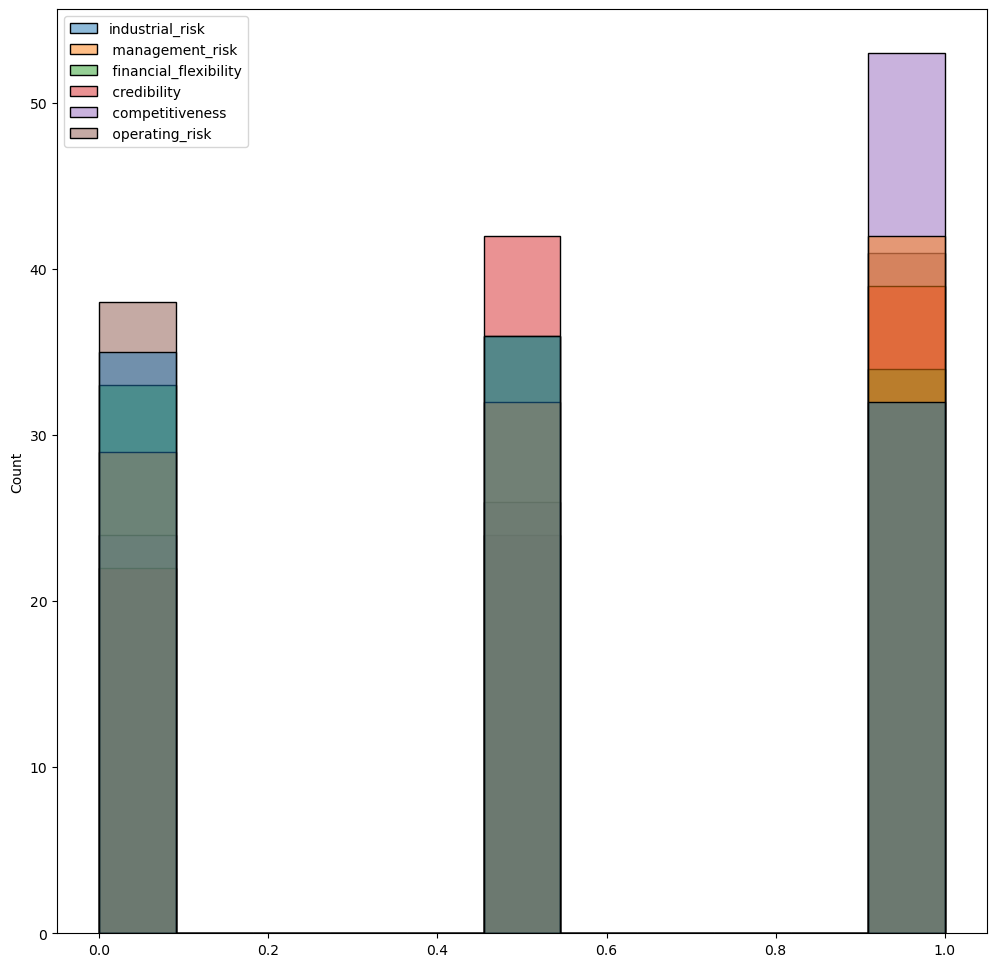

In [11]:
###---Histogram 
plt.figure(figsize=(12,12))
sns.histplot(data=df1)  
plt.show()

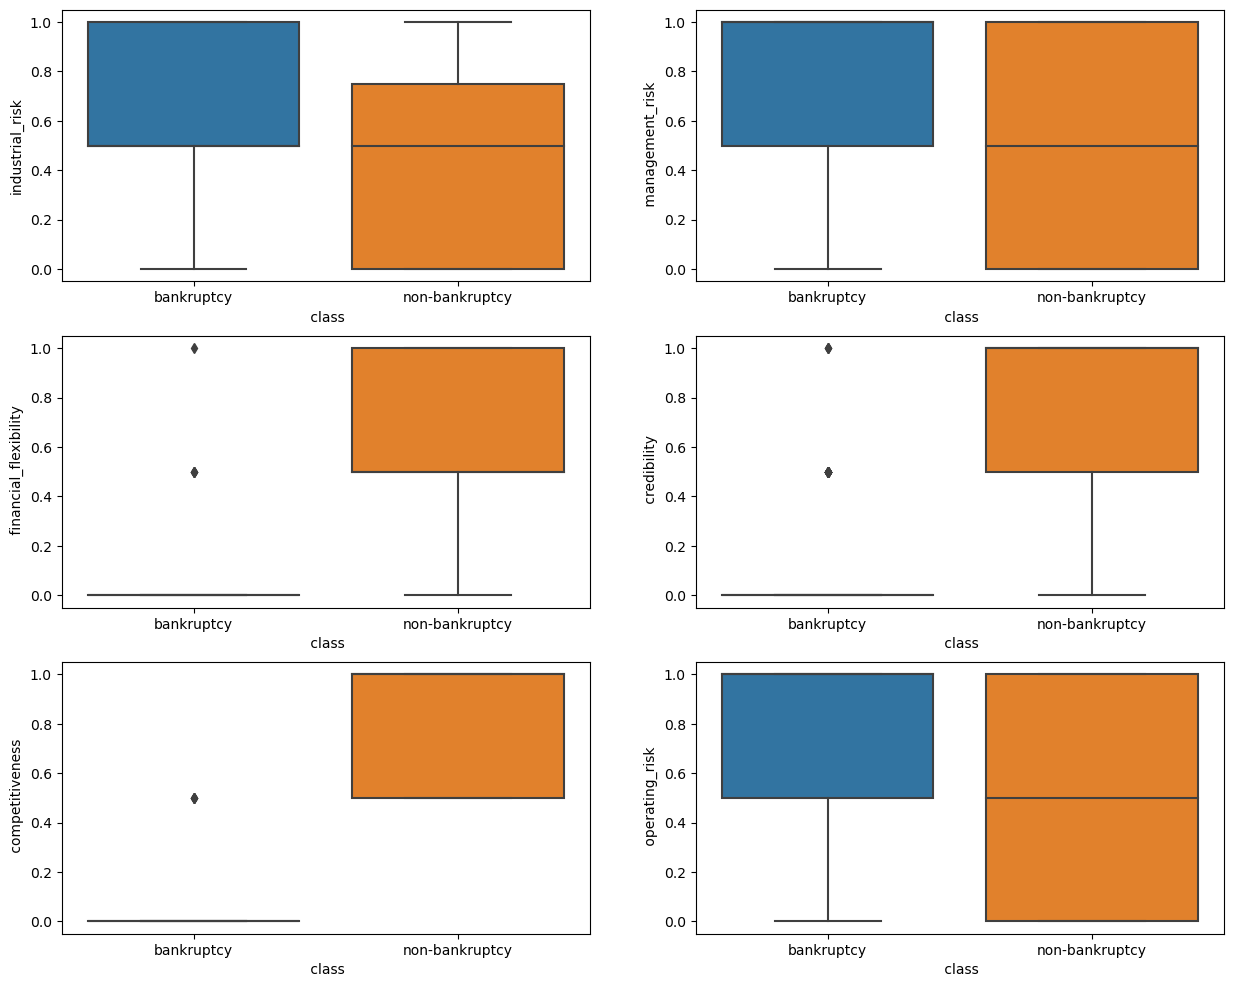

In [12]:
##---Boxplot 
plt.figure(figsize=(15, 12))
for i, predictor in enumerate(df1.drop(columns = [' class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x=' class', y=predictor )


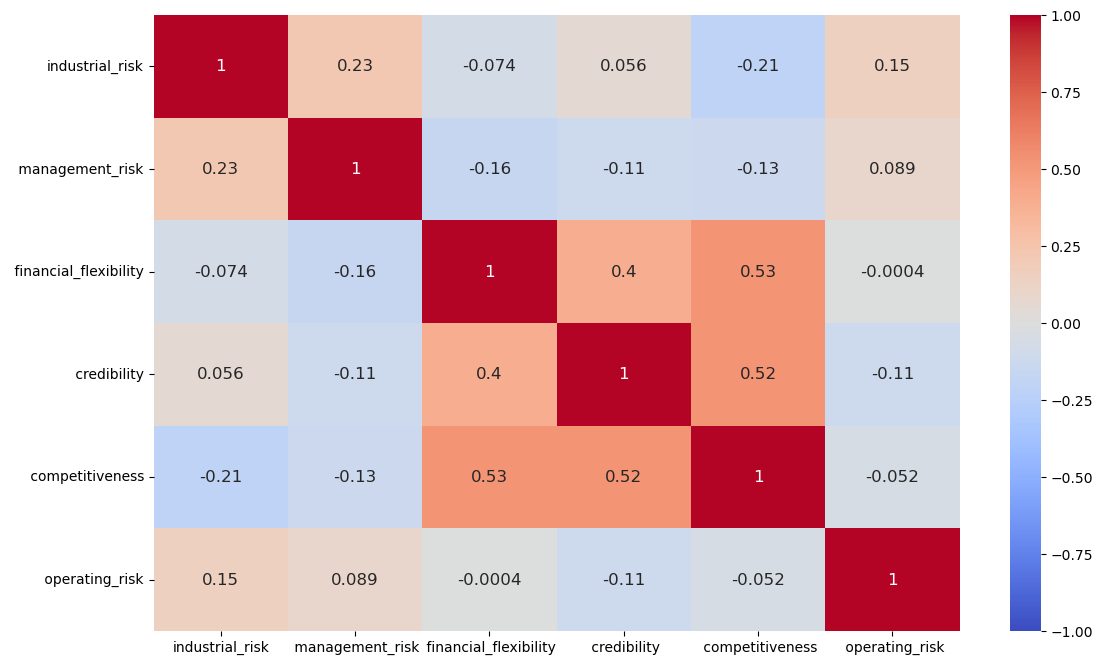

In [13]:
###---Heat map
plt.figure(figsize=(13,8))
sns.heatmap(df1.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':12})
plt.show()

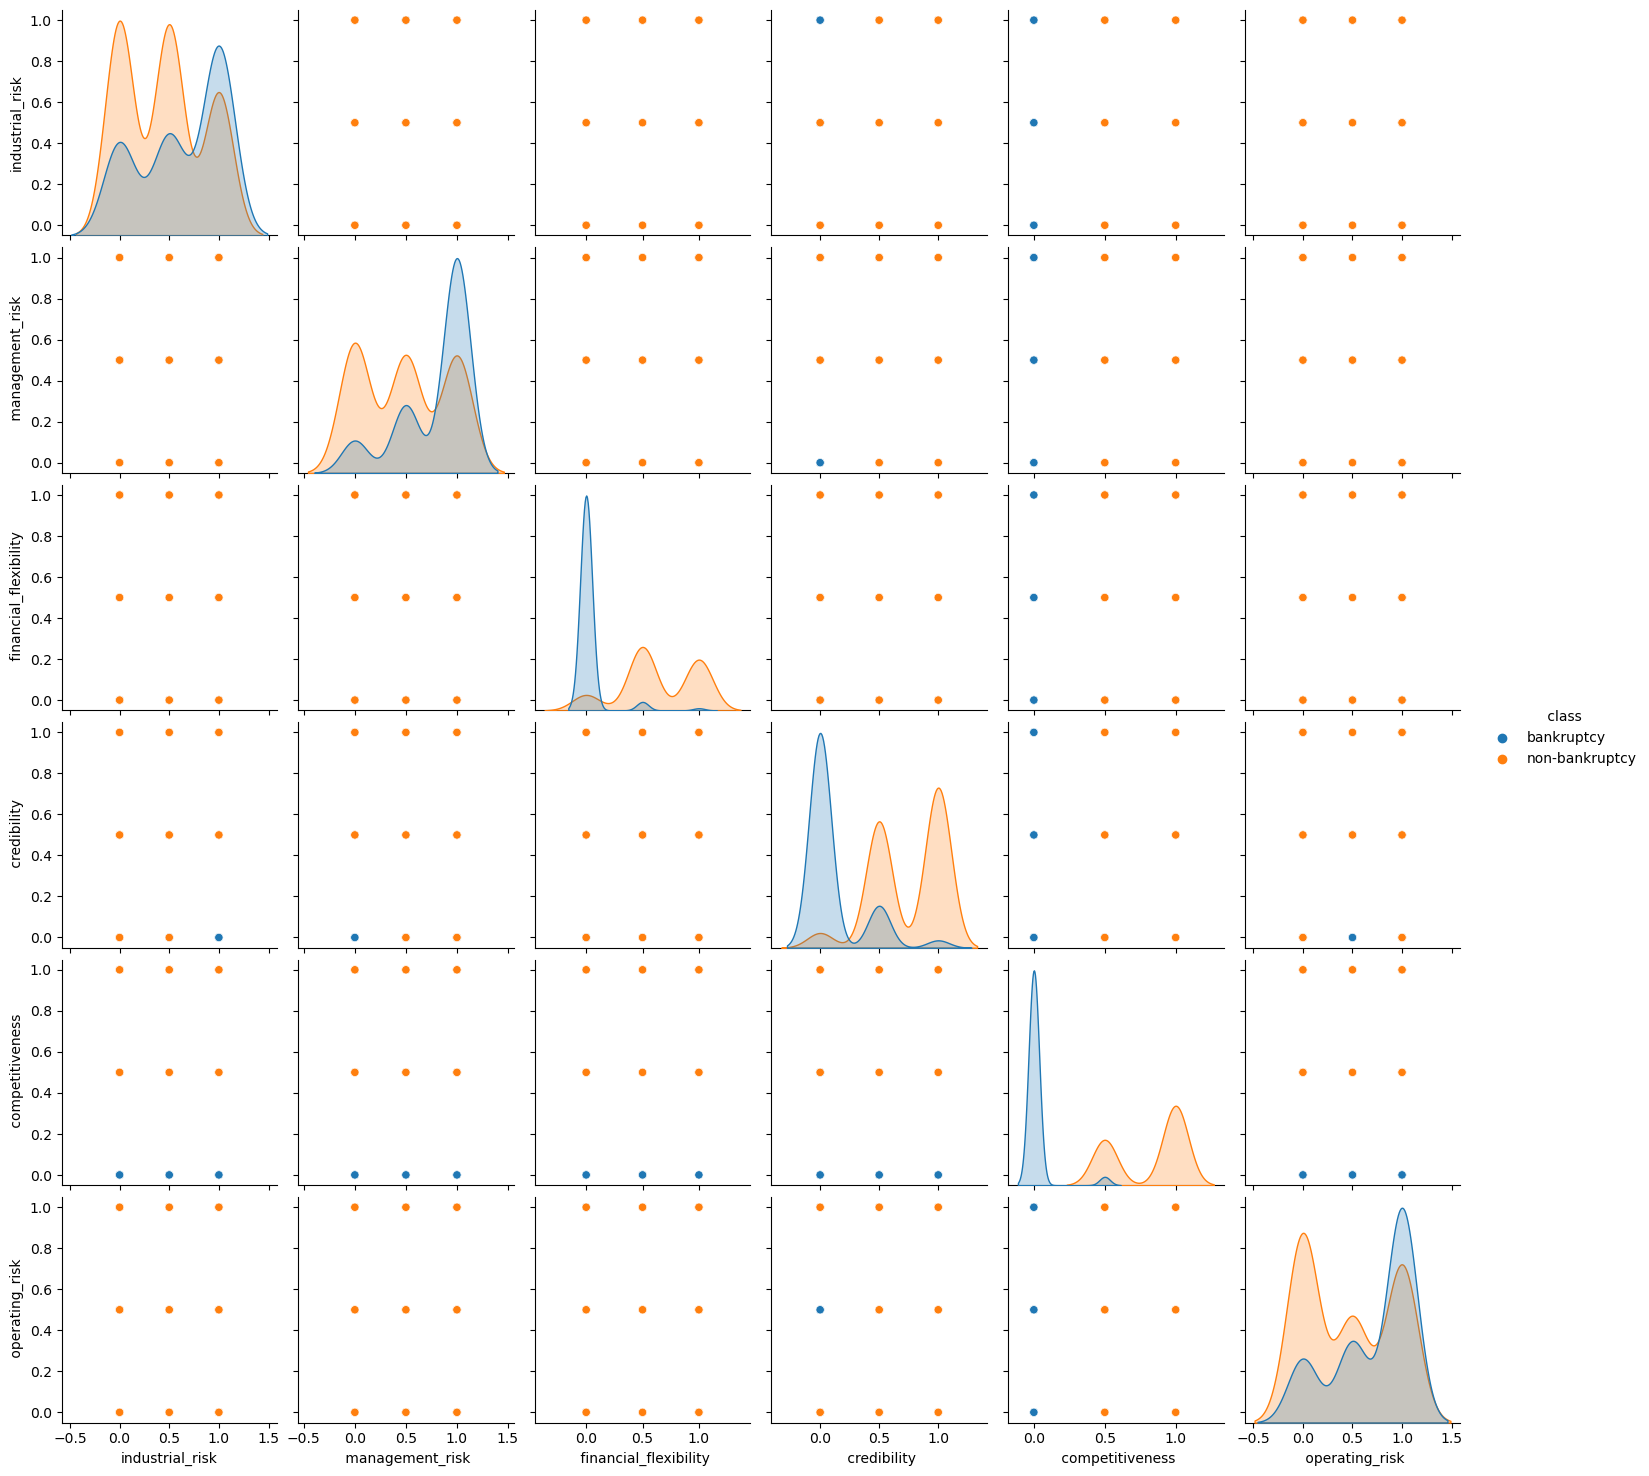

In [14]:
##--Pair-plot
sns.pairplot(df,hue=' class')
plt.show()


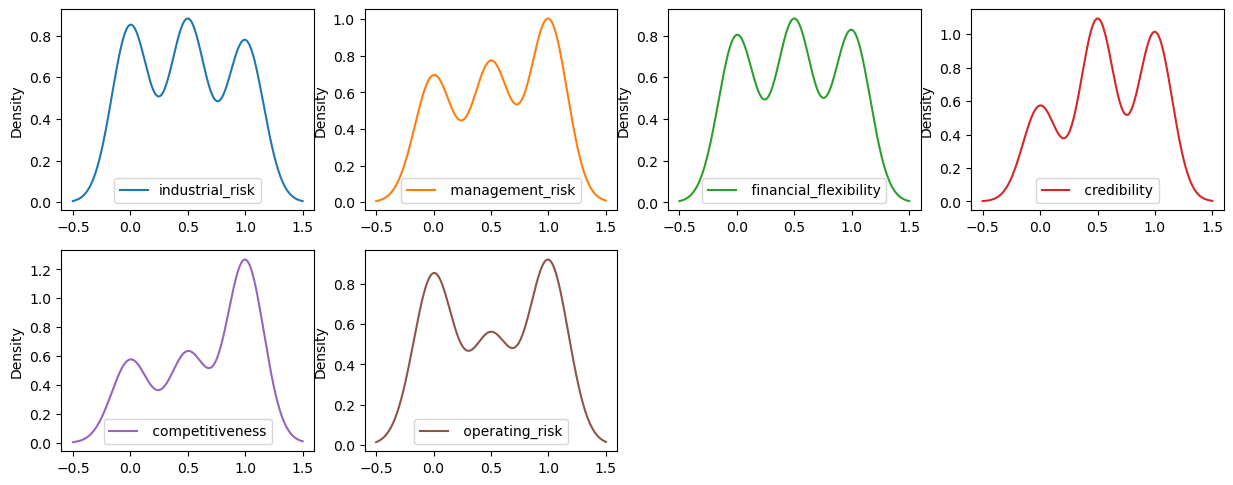

In [15]:
##--Density plot 
df1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,12))
plt.show()

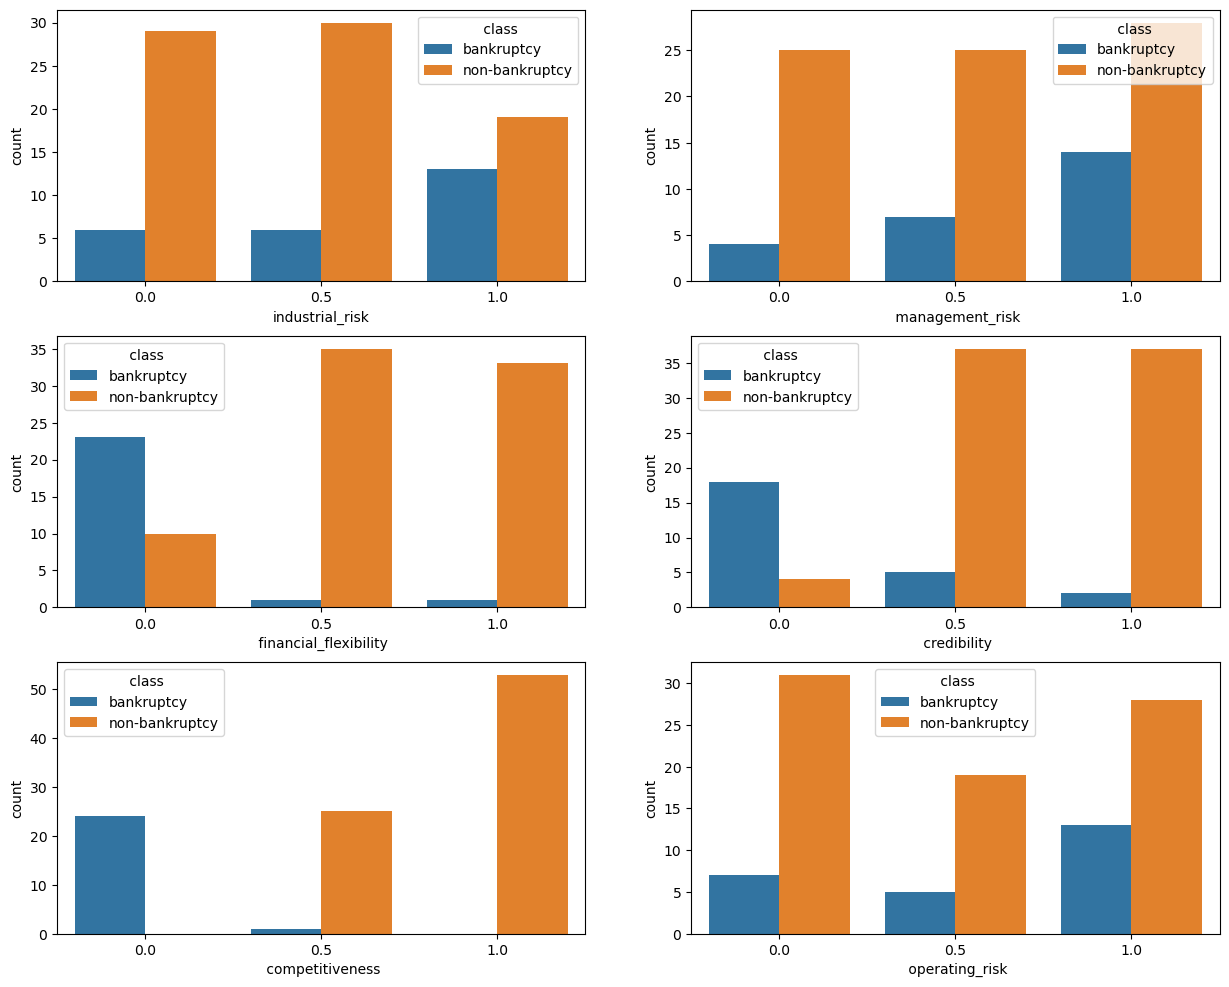

In [16]:
##--Count plot 
plt.figure(figsize=(15, 12))
for i, predictor in enumerate(df1.drop(columns = [' class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.countplot(data=df1, x=predictor, hue=' class')

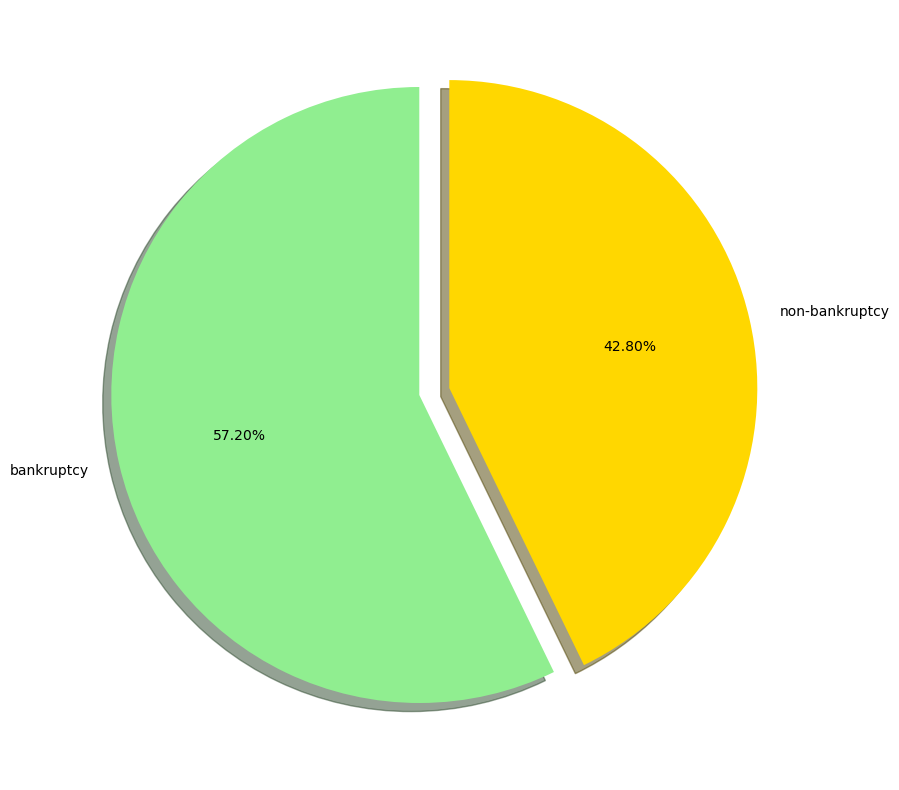

In [17]:
###--Pie chart
a =df[' class'].value_counts()[0]     
b =df[' class'].value_counts()[1]     

fig1, ax1 = plt.subplots(figsize=(10, 10))
label = ['bankruptcy', 'non-bankruptcy']
count = [a, b]
colors = ['lightgreen', 'gold']
explode = (0, 0.1)  # explode 2nd slice
plt.pie(count, labels=label, autopct='%0.2f%%', explode=explode, colors=colors,shadow=True, startangle=90)
plt.show()

In [18]:
###---Label Encoding
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()


In [19]:
df[' class']=Le.fit_transform(df[' class']) 

In [21]:
df[' class']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name:  class, Length: 250, dtype: int32

In [22]:
#---- X & Y-- variables---##
y=df[' class']
x = df.drop(' class', axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
# Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split


In [24]:
##--Standardization
ss = StandardScaler()
ss_x = ss.fit_transform(x)
pd.DataFrame(ss_x)

,0,1,2,3,4,5
0,-0.043827,0.941732,-0.938172,-1.132941,-1.082310,-0.161400
1,-1.261256,0.941732,-0.938172,-1.132941,-1.082310,0.991457
2,1.173601,-1.497989,-0.938172,-1.132941,-1.082310,0.991457
3,-0.043827,-1.497989,-0.938172,0.072315,-1.082310,0.991457
4,1.173601,0.941732,-0.938172,-1.132941,-1.082310,0.991457
...,...,...,...,...,...,...
245,-1.261256,0.941732,1.556967,1.277572,1.191451,0.991457
246,1.173601,0.941732,0.309397,1.277572,1.191451,-1.314257
247,-1.261256,0.941732,1.556967,0.072315,0.054570,-1.314257
248,1.173601,-1.497989,0.309397,1.277572,0.054570,-1.314257


In [25]:
##--Logistic regression
Lr.fit(ss_x,y)
y_pred = Lr.predict(ss_x)


In [26]:
training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3,random_state=i)
    Lr = LogisticRegression()
    Lr.fit(x_train, y_train)
    y_pred_train = Lr.predict(x_train)
    y_pred_test = Lr.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))


In [27]:
print("Average training_accuracy :",np.mean(training_accuracy).round(3))
print("Average test_accuracy:",np.mean(test_accuracy).round(3))


Average training_accuracy : 0.996
Average test_accuracy: 0.996


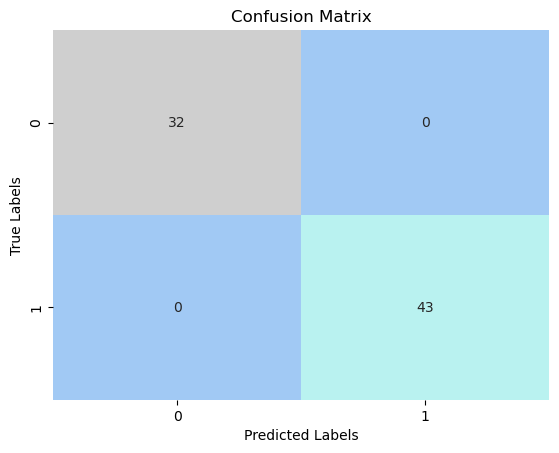

Accuacy score: 0.996


In [28]:
### -- confusion matrix---##
cm = confusion_matrix(y_test, y_pred_test)
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Accuacy score:", accuracy_score(y,y_pred).round(3))


In [29]:
##---KNN model 
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    knn = KNeighborsClassifier()  # Instantiating KNN model
    knn.fit(x_train, y_train)     # Fitting the KNN model
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))


Average training_accuracy: 0.994
Average test_accuracy: 0.991


In [30]:
###----Navies bayes 
from sklearn.naive_bayes import GaussianNB
training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    nb_classifier = GaussianNB()     
    nb_classifier.fit(x_train, y_train)  
    y_pred_train = nb_classifier.predict(x_train)
    y_pred_test = nb_classifier.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))


Average training_accuracy: 0.979
Average test_accuracy: 0.977


In [31]:
###---Support vector classifier 
from sklearn.svm import SVC

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    svm_classifier = SVC()     
    svm_classifier.fit(x_train, y_train)  
    y_pred_train = svm_classifier.predict(x_train)
    y_pred_test = svm_classifier.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))


Average training_accuracy: 1.0
Average test_accuracy: 0.995


In [32]:
###---Deccision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    dt_classifier = DecisionTreeClassifier()     
    dt_classifier.fit(x_train, y_train)  
    y_pred_train = dt_classifier.predict(x_train)
    y_pred_test = dt_classifier.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))

Average training_accuracy: 1.0
Average test_accuracy: 0.99


In [33]:
###--Bagging classifier 
from sklearn.ensemble import BaggingClassifier

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    base_classifier = DecisionTreeClassifier()  # Base classifier (you can replace this with any classifier)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=i)  # Bagging classifier
    bagging_classifier.fit(x_train, y_train)  
    y_pred_train = bagging_classifier.predict(x_train)
    y_pred_test = bagging_classifier.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))


Average training_accuracy: 0.999
Average test_accuracy: 0.989


In [34]:
###---Random forest classifier 
from sklearn.ensemble import RandomForestClassifier

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(ss_x, y, test_size=0.3, random_state=i)
    rf_classifier = RandomForestClassifier(n_estimators=10, random_state=i)  # Random Forest classifier
    rf_classifier.fit(x_train, y_train)  
    y_pred_train = rf_classifier.predict(x_train)
    y_pred_test = rf_classifier.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

print("Average training_accuracy:", np.mean(training_accuracy).round(3))
print("Average test_accuracy:", np.mean(test_accuracy).round(3))

Average training_accuracy: 1.0
Average test_accuracy: 0.993
